<a href="https://colab.research.google.com/github/Likitha-Thirumalasetty/Energy-Consumption-Forecasting/blob/main/Energy_consumption_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Energy Consumption Forecasting using Arima model**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
energy_consump=pd.read_csv('/content/World Energy Overview.csv',index_col=[0], parse_dates=[0])

In [ ]:
energy_consump.head()  #see the difference between dataframe and series

,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
Date,,,,,,,,,,,,
1973-01-31,4.932632,0.068103,0.403981,5.404715,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.403981,7.223873
1973-02-28,4.729582,0.064634,0.360900,5.155115,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.360900,6.592366
1973-03-31,4.946902,0.072494,0.400161,5.419556,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.400161,6.521439
1973-04-30,4.716271,0.064070,0.380470,5.160812,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.380470,5.941729
1973-05-31,4.956995,0.062111,0.392141,5.411246,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.392141,6.071940


In [ ]:
energy_consump.drop(['Total Fossil Fuels Production','Nuclear Electric Power Production','Total Renewable Energy Production','Total Primary Energy Production','Primary Energy Imports','Primary Energy Exports','Primary Energy Net Imports','Primary Energy Stock Change and Other','Total Fossil Fuels Consumption','Nuclear Electric Power Consumption','Total Renewable Energy Consumption'], inplace=True,axis=1)

In [ ]:
type(energy_consump)

pandas.core.frame.DataFrame

In [ ]:
series=energy_consump.values

In [ ]:
type(series)

numpy.ndarray

In [ ]:
energy_consump.size

599

In [ ]:
energy_consump.tail()

,Total Primary Energy Consumption
Date,
2022-07-31,8.584805
2022-08-31,8.530444
2022-09-30,7.782741
2022-10-31,7.811175
2022-11-30,8.285891


In [ ]:
energy_consump.describe()

,Total Primary Energy Consumption
count,599.000000
mean,7.441499
std,0.946882
min,5.435627
25%,6.659050
50%,7.617372
75%,8.111785
max,9.664299


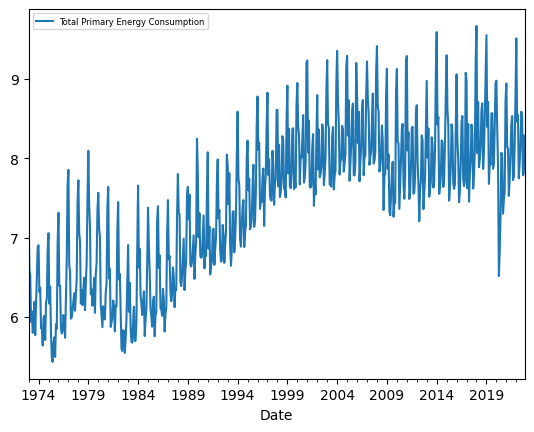

In [ ]:
energy_consump.plot()
plt.legend(fontsize=6)

In [ ]:
energy_consump_mean=energy_consump.rolling(window=20).mean() #moving avergaes for better visualisation

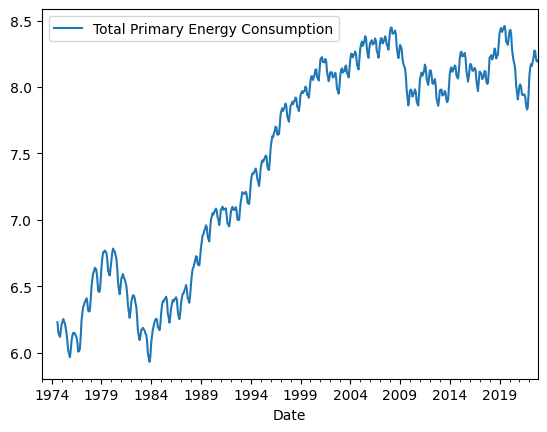

In [ ]:
energy_consump_mean.plot()
plt.legend(fontsize=10, loc='upper left')

In [ ]:
value=pd.DataFrame(series)

In [ ]:
energy_consump_df=pd.concat([value,value.shift(1)],axis=1)

In [ ]:
energy_consump_df.head()

,0,0
0,7.223873,NaN
1,6.592366,7.223873
2,6.521439,6.592366
3,5.941729,6.521439
4,6.071940,5.941729


In [ ]:
energy_consump_df.columns=(['Actual_Primary_Consumption','Foreacasted_Primary_Consumption'])

In [ ]:
energy_consump_df.head()

,Actual_Primary_Consumption,Foreacasted_Primary_Consumption
0,7.223873,NaN
1,6.592366,7.223873
2,6.521439,6.592366
3,5.941729,6.521439
4,6.071940,5.941729


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
energy_consump_test=energy_consump_df[1:]

In [ ]:
energy_consump_test.head()

,Actual_Primary_Consumption,Foreacasted_Primary_Consumption
1,6.592366,7.223873
2,6.521439,6.592366
3,5.941729,6.521439
4,6.071940,5.941729
5,5.802683,6.071940


In [ ]:
energy_consump_test.tail()

,Actual_Primary_Consumption,Foreacasted_Primary_Consumption
594,8.584805,8.155757
595,8.530444,8.584805
596,7.782741,8.530444
597,7.811175,7.782741
598,8.285891,7.811175


In [ ]:
error=mean_squared_error(energy_consump_test.Actual_Primary_Consumption,energy_consump_test.Foreacasted_Primary_Consumption)

In [ ]:
np.sqrt(error)

0.5164591976673965

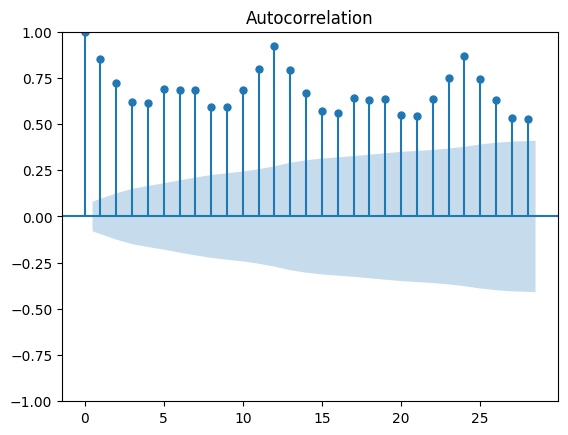

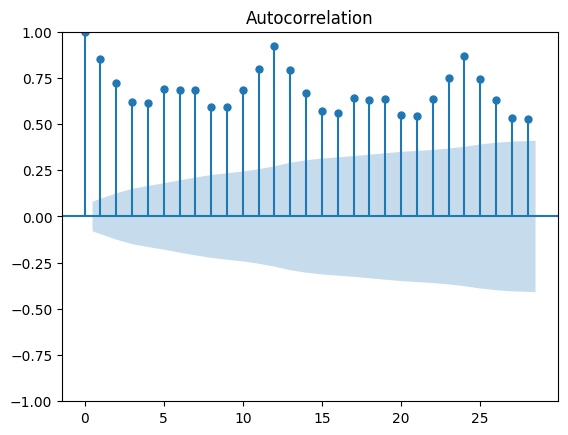

In [ ]:
#Using ARIMA - Autoaggressive Integrated Moving Average
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(energy_consump) #to identify the value of q

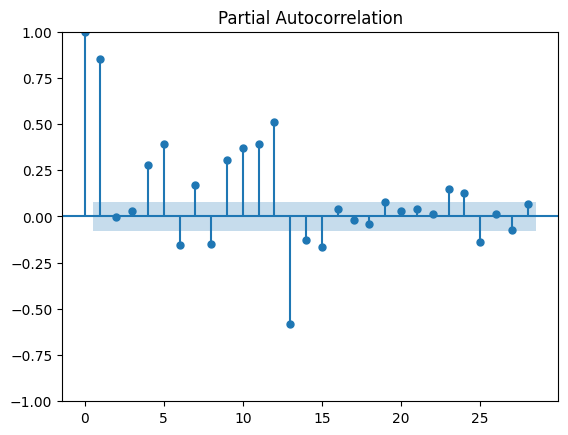

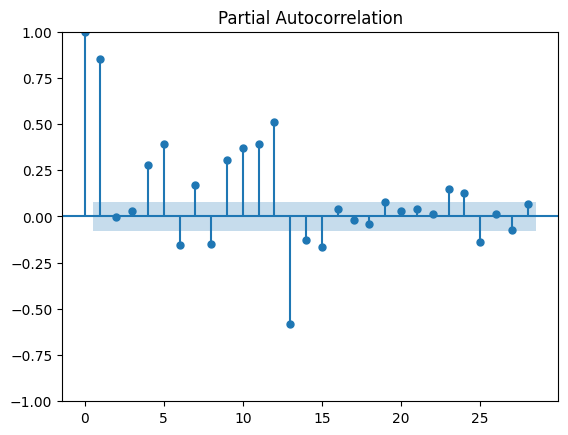

In [ ]:
plot_pacf(energy_consump) #to identify the value of p

In [ ]:
#p=3, d=0, q= 2

energy_consump.size

599

In [ ]:
energy_consump_train = energy_consump[0:360]
energy_consump_test = energy_consump[360::]

In [ ]:
energy_consump_train.size

360

In [ ]:
energy_consump_test.size

239

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
energy_consump_model=sm.tsa.arima.ARIMA(energy_consump_train,order=(2,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model= energy_consump_model.fit()

In [ ]:
model.aic

416.4542953216609

In [ ]:
energy_consump_forecast=model.forecast(steps=35)

In [ ]:
print(energy_consump_forecast)

2003-01-31    8.566285
2003-02-28    8.291086
2003-03-31    8.250376
2003-04-30    8.160165
2003-05-31    8.163398
2003-06-30    8.130562
2003-07-31    8.138182
2003-08-31    8.124961
2003-09-30    8.130285
2003-10-31    8.124517
2003-11-30    8.127553
2003-12-31    8.124897
2004-01-31    8.126503
2004-02-29    8.125239
2004-03-31    8.126061
2004-04-30    8.125448
2004-05-31    8.125862
2004-06-30    8.125562
2004-07-31    8.125769
2004-08-31    8.125621
2004-09-30    8.125724
2004-10-31    8.125651
2004-11-30    8.125702
2004-12-31    8.125666
2005-01-31    8.125691
2005-02-28    8.125673
2005-03-31    8.125686
2005-04-30    8.125677
2005-05-31    8.125683
2005-06-30    8.125679
2005-07-31    8.125682
2005-08-31    8.125680
2005-09-30    8.125681
2005-10-31    8.125680
2005-11-30    8.125681
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
energy_consump_test2=energy_consump_test[0:35]

In [ ]:
np.sqrt(mean_squared_error(energy_consump_test2, energy_consump_forecast))

0.49527955216713887

# **Energy Consumption forecasting using Long-short-Term Memory**

Epoch 1/50
13/13 [==============================] - 5s 13ms/step - loss: 0.1004
Epoch 2/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0292
Epoch 3/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0220
Epoch 4/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0199
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0192
Epoch 6/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0188
Epoch 7/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0187
Epoch 8/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0185
Epoch 9/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0185
Epoch 10/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0185
Epoch 11/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0187
Epoch 12/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0194
Epoch 13/50
13/13 [==================

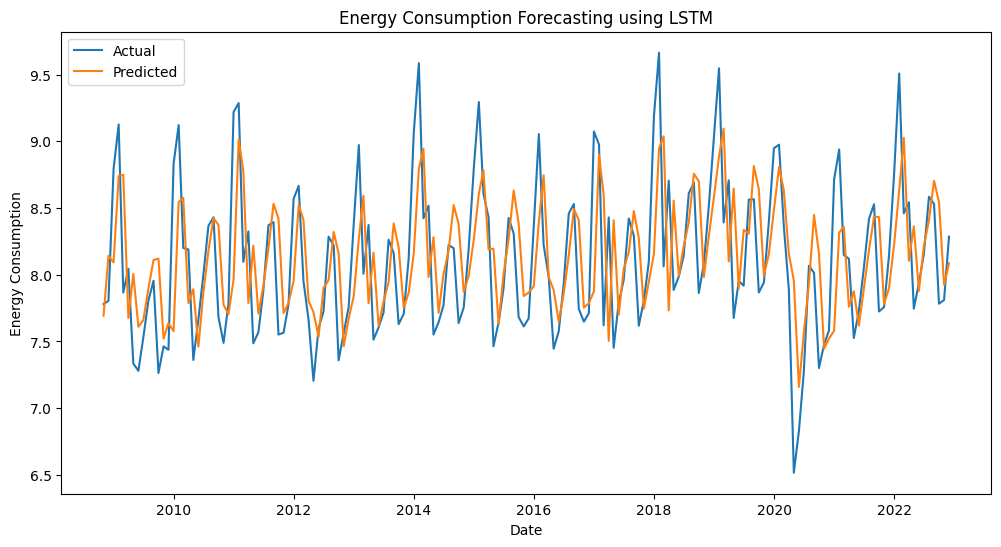

Mean Squared Error (MSE): 0.25308585511317705


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the time series data (replace 'data.csv' with your dataset)
data = pd.read_csv('/content/World Energy Overview.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
energy_data = data['Total Primary Energy Consumption'].values.reshape(-1, 1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(energy_data)

# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Set sequence length and split data into training and testing sets
sequence_length = 10
training_size = int(len(scaled_data) * 0.7)
training_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

# Generate sequences for training and testing
X_train = create_sequences(training_data, sequence_length)
y_train = training_data[sequence_length:]
X_test = create_sequences(test_data, sequence_length)
y_test = test_data[sequence_length:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_data = model.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[training_size + sequence_length:], data['Total Primary Energy Consumption'][training_size + sequence_length:], label='Actual')
plt.plot(data.index[training_size + sequence_length:], predicted_data, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecasting using LSTM')
plt.show()

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(data['Total Primary Energy Consumption'][training_size + sequence_length:], predicted_data)
print("Mean Squared Error (MSE):", mse)


# **Energy Consumption Forecasting using Random Forests**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load and preprocess the time series data (replace 'data.csv' with your dataset)
data = pd.read_csv('/content/World Energy Overview.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Feature engineering: creating lag features as predictors
for i in range(1, 11):  # Assuming 10 lag features
    data[f'lag_{i}'] = data['Total Primary Energy Consumption'].shift(i)

# Dropping missing values (due to lagged features)
data.dropna(inplace=True)

# Splitting data into train and test sets
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Define features (lagged values) and target variable
features = [col for col in data.columns if col.startswith('lag_')]
target = 'Total Primary Energy Consumption'

# Training and testing data
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE) for Random Forests:", mae)


Mean Absolute Error (MAE) for Random Forests: 0.2074667679661012
